In [230]:
import numpy as np
import pandas as pd
import re
from datetime import datetime as dt
from datetime import timedelta

#Data Exploration and processing phase

In [231]:
nov_df = pd.read_csv("November Sleep Data - Sheet1.csv")

In [232]:
nov_df.head()

,NOVEMBER,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Monday,11/1/2021,88.0,8:06:00,20.00%,13.00%,84.00%,10:41pm - 7:54am
2,Tuesday,11/2/2021,83.0,7:57:00,12.00%,18.00%,90.00%,10:40pm - 7:55am
3,Wednesday,11/3/2021,81.0,7:06:00,13.00%,22.00%,93.00%,11:03pm - 7:16am
4,Thursday,11/4/2021,86.0,7:04:00,19.00%,17.00%,97.00%,10:55pm - 6:56am


In [233]:
# Drop missing values
nov_df.dropna(inplace=True)

In [234]:
nov_df.rename({"{}".format(nov_df.columns[0]): "DAY OF WEEK"},axis=1, inplace=True)

In [235]:
nov_df.head()

,DAY OF WEEK,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
1,Monday,11/1/2021,88.0,8:06:00,20.00%,13.00%,84.00%,10:41pm - 7:54am
2,Tuesday,11/2/2021,83.0,7:57:00,12.00%,18.00%,90.00%,10:40pm - 7:55am
3,Wednesday,11/3/2021,81.0,7:06:00,13.00%,22.00%,93.00%,11:03pm - 7:16am
4,Thursday,11/4/2021,86.0,7:04:00,19.00%,17.00%,97.00%,10:55pm - 6:56am
5,Friday,11/5/2021,81.0,9:24:00,17.00%,15.00%,66.00%,10:14pm - 9:01am


In [236]:
nov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DAY OF WEEK               30 non-null     object 
 1   DATE                      30 non-null     object 
 2   SLEEP SCORE               30 non-null     float64
 3   HOURS OF SLEEP            30 non-null     object 
 4   REM SLEEP                 30 non-null     object 
 5   DEEP SLEEP                30 non-null     object 
 6   HEART RATE BELOW RESTING  30 non-null     object 
 7   SLEEP TIME                30 non-null     object 
dtypes: float64(1), object(7)
memory usage: 2.1+ KB


In [237]:
# Converting percentage string to decimal numbers
percentage_columns_list = ['REM SLEEP', 'DEEP SLEEP', 'HEART RATE BELOW RESTING']

nov_df[percentage_columns_list] = nov_df[percentage_columns_list].apply(lambda x: x.str.strip("%").astype(np.float32) / 100)

In [238]:
# conveting hours of sleep to minutes of sleep in order to be represented as a numeric value

nov_df['HOURS OF SLEEP'] = nov_df['HOURS OF SLEEP'].apply(lambda x: float(x.split(":")[0]) * 60 + float(x.split(":")[1]))




In [239]:
nov_df.rename({"HOURS OF SLEEP": "MINUTES OF SLEEP"}, axis=1, inplace=True)

In [240]:
nov_df.head()

,DAY OF WEEK,DATE,SLEEP SCORE,MINUTES OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
1,Monday,11/1/2021,88.0,486.0,0.20,0.13,0.84,10:41pm - 7:54am
2,Tuesday,11/2/2021,83.0,477.0,0.12,0.18,0.90,10:40pm - 7:55am
3,Wednesday,11/3/2021,81.0,426.0,0.13,0.22,0.93,11:03pm - 7:16am
4,Thursday,11/4/2021,86.0,424.0,0.19,0.17,0.97,10:55pm - 6:56am
5,Friday,11/5/2021,81.0,564.0,0.17,0.15,0.66,10:14pm - 9:01am


In [241]:
# performing one hot encoding of DAY OF WEEK

from sklearn.preprocessing import OneHotEncoder
day_encoder =  OneHotEncoder()
one_hot_encoded_features = day_encoder.fit_transform(nov_df['DAY OF WEEK'].values.reshape(-1, 1)).toarray()
encoded_feat_df = pd.DataFrame(one_hot_encoded_features, columns=day_encoder.categories_, index=nov_df.index)
nov_df[day_encoder.categories_[0]] = encoded_feat_df

In [242]:
nov_df.head()

,DAY OF WEEK,DATE,SLEEP SCORE,MINUTES OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
1,Monday,11/1/2021,88.0,486.0,0.20,0.13,0.84,10:41pm - 7:54am,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Tuesday,11/2/2021,83.0,477.0,0.12,0.18,0.90,10:40pm - 7:55am,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Wednesday,11/3/2021,81.0,426.0,0.13,0.22,0.93,11:03pm - 7:16am,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Thursday,11/4/2021,86.0,424.0,0.19,0.17,0.97,10:55pm - 6:56am,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,Friday,11/5/2021,81.0,564.0,0.17,0.15,0.66,10:14pm - 9:01am,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
# Performing Standardization of features

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

transformed_features_0 = sc.fit_transform(nov_df.drop(['DAY OF WEEK', 'DATE', 'SLEEP TIME', 'SLEEP SCORE'], axis=1))
print(transformed_features_0.shape)


(30, 11)


In [244]:
target_0 = nov_df['SLEEP SCORE']

#Training initial model

In [245]:
# Performing Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(transformed_features_0, target_0)

LinearRegression()

#Streamlining the data prepocessing phase

In [246]:
# defining the preprocessing function

def preprocess(df):
  df.dropna(inplace=True)
  df.rename({"{}".format(df.columns[0]): "DAY OF WEEK"},axis=1, inplace=True)
  percentage_columns_list = ['REM SLEEP', 'DEEP SLEEP', 'HEART RATE BELOW RESTING']
  df[percentage_columns_list] = df[percentage_columns_list].apply(lambda x: x.str.strip("%").astype(np.float32) / 100)
  df['HOURS OF SLEEP'] = df['HOURS OF SLEEP'].apply(lambda x: float(x.split(":")[0]) * 60 + float(x.split(":")[1]))
  day_encoder =  OneHotEncoder()
  one_hot_encoded_features = day_encoder.fit_transform(df['DAY OF WEEK'].values.reshape(-1, 1)).toarray()
  encoded_feat_df = pd.DataFrame(one_hot_encoded_features, columns=day_encoder.categories_, index=df.index)
  df[day_encoder.categories_[0]] = encoded_feat_df
  sc = StandardScaler()
  transformed_features = sc.fit_transform(nov_df.drop(['DAY OF WEEK', 'DATE', 'SLEEP TIME', 'SLEEP SCORE'], axis=1))
  target = df['SLEEP SCORE']

  return transformed_features, target





#Testing various models

In [247]:
dec_df = pd.read_csv('/content/December Sleep data - Sheet1.csv')

In [248]:
transformed_features_1, target_1 = preprocess(dec_df)

In [249]:
predictions_1 = lr.predict(transformed_features_1)

In [250]:
from sklearn.metrics import mean_squared_error

In [251]:
RMSE_1 = np.sqrt(mean_squared_error(target_1[:-1], predictions_1))

In [252]:
print("RMSE for Linear Regression on December data:", RMSE_1)

RMSE for Linear Regression on December data: 4.6320667148063555


In [253]:
jan_df = pd.read_csv('/content/January sleep data - Sheet1.csv')

In [254]:
jan_df.rename({'HEART RATE UNDER RESTING': 'HEART RATE BELOW RESTING'}, axis=1, inplace=True)

In [255]:
transformed_features_2, target_2 = preprocess(jan_df)

In [256]:
predictions_2 = lr.predict(transformed_features_2)

In [257]:
RMSE_2 = np.sqrt(mean_squared_error(target_2[:-1], predictions_2))

In [258]:
print("RMSE for Linear Regression on January data:", RMSE_2)

RMSE for Linear Regression on January data: 7.139869516614151


In [259]:
# Performing linear regression with elastic net regularization
from sklearn.linear_model import ElasticNet

In [260]:
en = ElasticNet()

en.fit(transformed_features_0, target_0)

ElasticNet()

In [261]:
predictions_3 = en.predict(transformed_features_1)

In [262]:
RMSE_3 = np.sqrt(mean_squared_error(target_1[:-1], predictions_3))

In [263]:
print("RMSE for elastic net on December data:", RMSE_3)

RMSE for elastic net on December data: 4.261016539392224


In [264]:
predictions_4 = en.predict(transformed_features_2)

In [265]:
RMSE_4 = np.sqrt(mean_squared_error(target_2[:-1], predictions_4))

In [266]:
print("RMSE for elastic net on January data:", RMSE_4)

RMSE for elastic net on January data: 6.0934689733975365


In [267]:
from sklearn.ensemble import GradientBoostingRegressor

In [268]:
gbr = GradientBoostingRegressor()

gbr.fit(transformed_features_0, target_0)

GradientBoostingRegressor()

In [269]:
predictions_5 = gbr.predict(transformed_features_1)

In [270]:
RMSE_5 = np.sqrt(mean_squared_error(target_1[:-1], predictions_5))

In [271]:
print("RMSE for Gradient Boost Regression on December data:", RMSE_5)

RMSE for Gradient Boost Regression on December data: 4.537694662762146


In [272]:
predictions_6 = gbr.predict(transformed_features_2)

In [273]:
RMSE_6 = np.sqrt(mean_squared_error(target_2[:-1], predictions_6))

In [274]:
print("RMSE for Gradient Boost Regression on January data:", RMSE_6)

RMSE for Gradient Boost Regression on January data: 7.105847425305403


In [275]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(transformed_features_0, target_0)

SVR()

In [276]:
predictions_7 = svr.predict(transformed_features_1)

In [277]:
RMSE_7 = np.sqrt(mean_squared_error(target_1[:-1], predictions_7))

In [278]:
print("RMSE for Support Vector Machines Regression on December data:", RMSE_7)

RMSE for Support Vector Machines Regression on December data: 4.16125864245606


In [279]:
predictions_8 = svr.predict(transformed_features_2)

In [280]:
RMSE_8 = np.sqrt(mean_squared_error(target_2[:-1], predictions_8))

In [281]:
print("RMSE for Support Vector Machines Regression on January data:", RMSE_8)

RMSE for Support Vector Machines Regression on January data: 5.663490651343245


#Comparing model Performances

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

In [283]:
model_performances = pd.DataFrame({
    "model": ['Linear Regression', 'Linear Regression', 'ElasticNet', 'ElasticNet', 'Gradient Boost Regressor', 'Gradient Boost Regressor',
              'Support Vector Regressor', 'Support Vector Regressor'],
    "month": ['December', 'January', 'December', 'January', 'December', 'January', 'December', 'January'],

    "RMSE" : [RMSE_1, RMSE_2, RMSE_3, RMSE_4, RMSE_5, RMSE_6, RMSE_7, RMSE_8]
}
)

In [284]:
model_performances

,model,month,RMSE
0,Linear Regression,December,4.632067
1,Linear Regression,January,7.139870
2,ElasticNet,December,4.261017
3,ElasticNet,January,6.093469
4,Gradient Boost Regressor,December,4.537695
5,Gradient Boost Regressor,January,7.105847
6,Support Vector Regressor,December,4.161259
7,Support Vector Regressor,January,5.663491


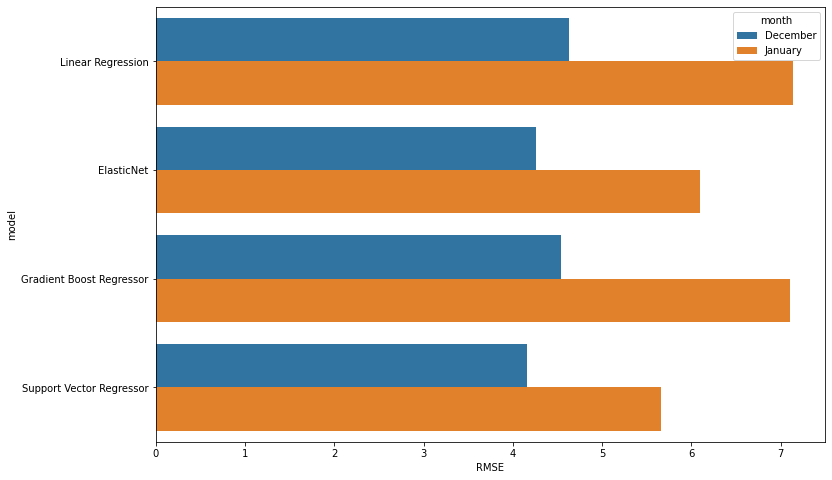

In [285]:
plt.figure(figsize=(12,8))
sns.barplot(data=model_performances, y='model', x='RMSE', hue='month')